# Homework Assignment 1 - GROUP 3

_Due by 09-FEB-2021_

<b>GROUP 3: Brie D., Aastha M., Bindhya N, Aaron C.</b>

The data for this homework assignment is sourced from the UCI Machine Learning Repository. This [link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) includes a brief description of all columns (features) available this dataset. You can download this data set from BlackBoard under the `Data` folder to your local computer and then read those files into Python. 

Answer the following questions based on this dataset. Submit a Jupyter Notebook that contains all your code that you used to answer these questions. You can post your submission on Canvas or via email (patelvj2@vcu.edu). The Jupyter Notebook must be fully executable with no/minimal changes (such as the location of the input file).

**1. Plot histograms for all variables in this data set. Add a vertical line to show the average value of each variable. Add a chart title for each chart.**

In [11]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#read, clean

df = pd.read_csv(r'..\data\winequality.csv')

#C:\Users\clark\Desktop\DAPT Courses\semester_2\631_data_mining\data

df = df.drop(df.columns[0],axis=1)

df.columns = df.columns.str.replace(' ', "_")

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\winequality.csv'

In [2]:
#select columsn; build subplots; format layout; iterate through, color, label, average value of columns

num_cols = df.columns[(df.dtypes=='int64') | (df.dtypes == 'float64')] 
mean_val=df.iloc[:,].mean()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12,12))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
        col = num_cols[i]
        df[col].hist(bins=100, ax=ax, grid=False, color=sns.color_palette()[i-2]) 
        ax.set_xlabel(col, weight='bold', size=10)
        ax.axvline(mean_val[i], color='black', linestyle='dotted', linewidth=3)
        
        #color = sns.color_palette("muted", 12)[i]
        

NameError: name 'df' is not defined

**2. Identify two features that are most correlated with each other. Visualize their relationship using an appropriate chart type.**

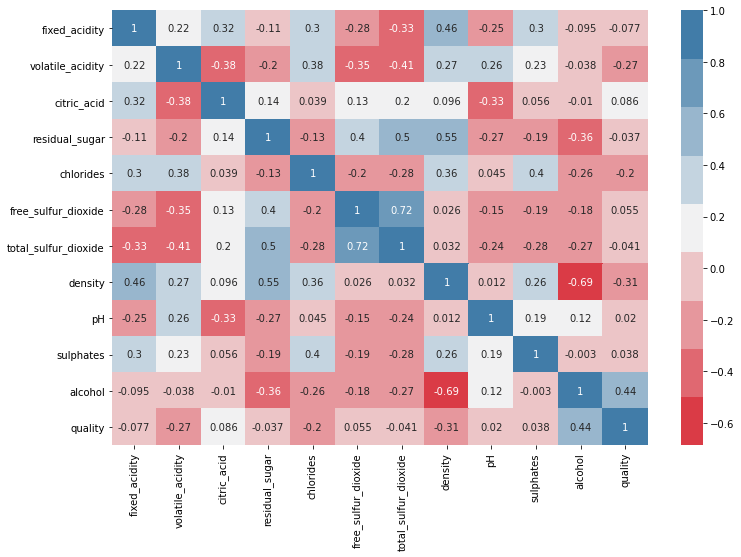

In [98]:
cmap = sns.diverging_palette(10, 240, n=9 )

f, ax = plt.subplots(figsize=(12,8))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap=cmap); #free_SO2, tot_SO2 (.72)

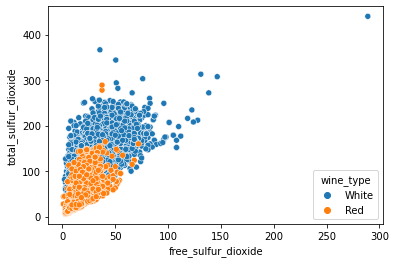

In [99]:
sns.scatterplot(x='free_sulfur_dioxide', y='total_sulfur_dioxide', data=df, hue = 'wine_type');

**3. Identify the feature that is most correlated with the wine quality and plot their relationship using an appropriate chart type.**

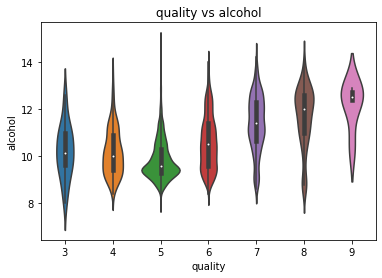

In [100]:
plt.title('quality vs alcohol')
sns.violinplot(x='quality', y='alcohol', data=df);

**4. Calcuate average alcohol content for each wine quality score. Store the average alcohol content for the best quality wine in a variable called `avg_alcohol_for_best_wine` and print it using the following statement:**

`print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')`

In [101]:
mean_alc_by_qual = df.groupby('quality')['alcohol'].mean()

avg_alcohol_for_best_wine = mean_alc_by_qual[df.quality.max()]

print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')

The average alcohol content for the best wine is 12.18.


**5. Calculate correlation coefficients between wine quality and all other features _separately for each wine type_. Identify any one feature that has contradictory relationships across the wine type. (For example, a feture has positive correlation with the wine quality for red wines, and negative correlation coefficients with the wine quality of white wines.)**

**Plot the relationship of the selected feature with wine quality using an appropriate chart type.**

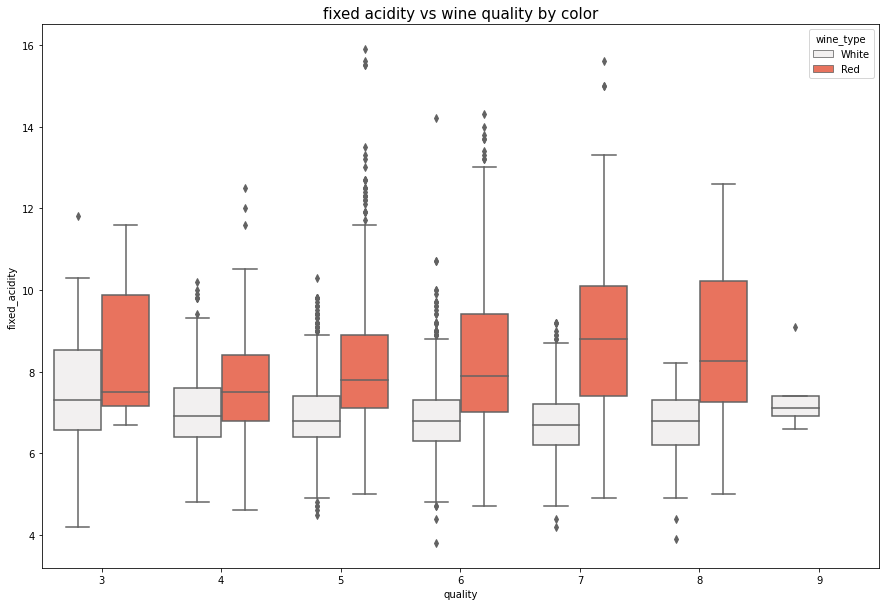

In [102]:
##produce dfs by wine_type; explore corr matrix

df_red = df[df['wine_type']=='Red'] #fixed_acitidy Red == 0.12
corr_matrix_red = df_red.corr()

df_white = df[df['wine_type']=='White'] #fixed_acidity White == -.11
corr_matrix_white = df_white.corr()

plt.figure(figsize=[15,10])
plt.title('fixed acidity vs wine quality by color', size=15)
sns.boxplot(x='quality', y='fixed_acidity', data=df, color='tomato', hue = 'wine_type');

##red wines appear to have somewhat of a higher quality rating when their fixed acidity is higher

**6. Create a dataframe (see example below) that contains one the overall average for each variable as well as its average value for Red and White wines. Divide both averages by the overall average to create an index for each variable. Multiply the index columns by 100. Which two variables have the highest index?**

|                 | Red      | White    | Overall  | White_Index | Red_Index  |
|-----------------|----------|----------|----------|-------------|------------|
|fixed acidity	  | 8.319637 | 6.854788 | 7.215307 | 95.003409   | 115.305381 |
|volatile acidity |	0.527821 | 0.278241	| 0.339666 | 81.916094   | 155.3939   |
|.................|..........|..........|..........|.............|............|

In [103]:
wine_type_means = df.groupby('wine_type').mean().T
all_means = df.mean().T.to_frame()

wine_df = wine_type_means.join(all_means) #joins overall avg to red/white average columns

wine_df.rename(columns={0:'Overall'}, inplace=True) # or use wine_df.columns=['Red', 'White', 'Overall']

wine_df['White_index'] = wine_df.White / wine_df.Overall *100
wine_df['Red_index'] = wine_df.Red / wine_df.Overall *100

wine_df

,Red,White,Overall,White_index,Red_index
fixed_acidity,8.319637,6.854788,7.215307,95.003409,115.305381
volatile_acidity,0.527821,0.278241,0.339666,81.916094,155.393979
citric_acid,0.270976,0.334192,0.318633,104.882822,85.043114
residual_sugar,2.538806,6.391415,5.443235,117.419411,46.641480
chlorides,0.087467,0.045772,0.056034,81.686956,156.095866
free_sulfur_dioxide,15.874922,35.308085,30.525319,115.668192,52.005752
total_sulfur_dioxide,46.467792,138.360657,115.744574,119.539648,40.146843
density,0.996747,0.994027,0.994697,99.932717,100.206098
pH,3.311113,3.188267,3.218501,99.060612,102.877500
sulphates,0.658149,0.489847,0.531268,92.203299,123.882579


In [104]:
white_max_val = wine_df.White_index.max()
white_max_var = wine_df.loc[wine_df.White_index == white_max_val].axes[0].tolist()

red_max_val = wine_df.Red_index.max()
red_max_var = wine_df.loc[wine_df.Red_index == red_max_val].axes[0].tolist()

print(f'The variables {white_max_var[0]} and {red_max_var[0]} have the highest index values of {round(white_max_val,1)} and {round(red_max_val,1)}, for white and red wine, respectively.')

The variables total_sulfur_dioxide and chlorides have the highest index values of 119.5 and 156.1, for white and red wine, respectively.


**7. Replace 'Red' with 1 and 'White' with 0 in the `wine type` column. What percentage of all records in the dataset are for Red wines?**

In [105]:
df.wine_type = df.wine_type.replace('White', 0)
df.wine_type = df.wine_type.replace('Red', 1)

color_pct = dict(df.groupby('wine_type').size() / len(df))
red_pct = '{:.1%}'.format(color_pct[1])

print(f'Red wines make up {red_pct} of the data in the dataset')

Red wines make up 24.6% of the data in the dataset
